# Assignment 6 - Nicholas Thornton
### Do Question 6, and three more questions of your choice.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Set review:

- Operations on sets (hints: sketch venn-type diagrams, and showing $A=B$ is the same as $A \subseteq B$ and $B \subseteq A$):
- $ (A \backslash B) \cup (A \cap B) = A $
- $ A \cup ( B \cap C) = (A \cup B) \cap (A \cup C)$
- $ A \backslash (B \cup C) = A\backslash B \cap A \backslash C $ and $A \backslash (B \cap C) = A \backslash B \cup A \backslash C$

- Plot the following sets: 
    - $A = \{x \in \mathbb{R}: x^2 -1 \ge 0 \}$ 
    - $B = \{ (x,y) \in \mathbb{R}^2: 3x -2y \ge 0 \}$
    - $C = \{ (x,y) \in \mathbb{R}^2: xy \ge 3 \}$
    - $D = \{ (x_1,x_2) \in \mathbb{R}^2: x_1 \ge 0, x_2 \ge 0, x_1 + x_2 \le 1 \}$
- The power set of $A$ is the set of all subsets of $A$, denoted $\mathcal{P}(A)$. What is the power set of $\{ 1, 2, 3 \}$? (Hint: The empty set is a subset of every set; the whole set is a subset of itself.)

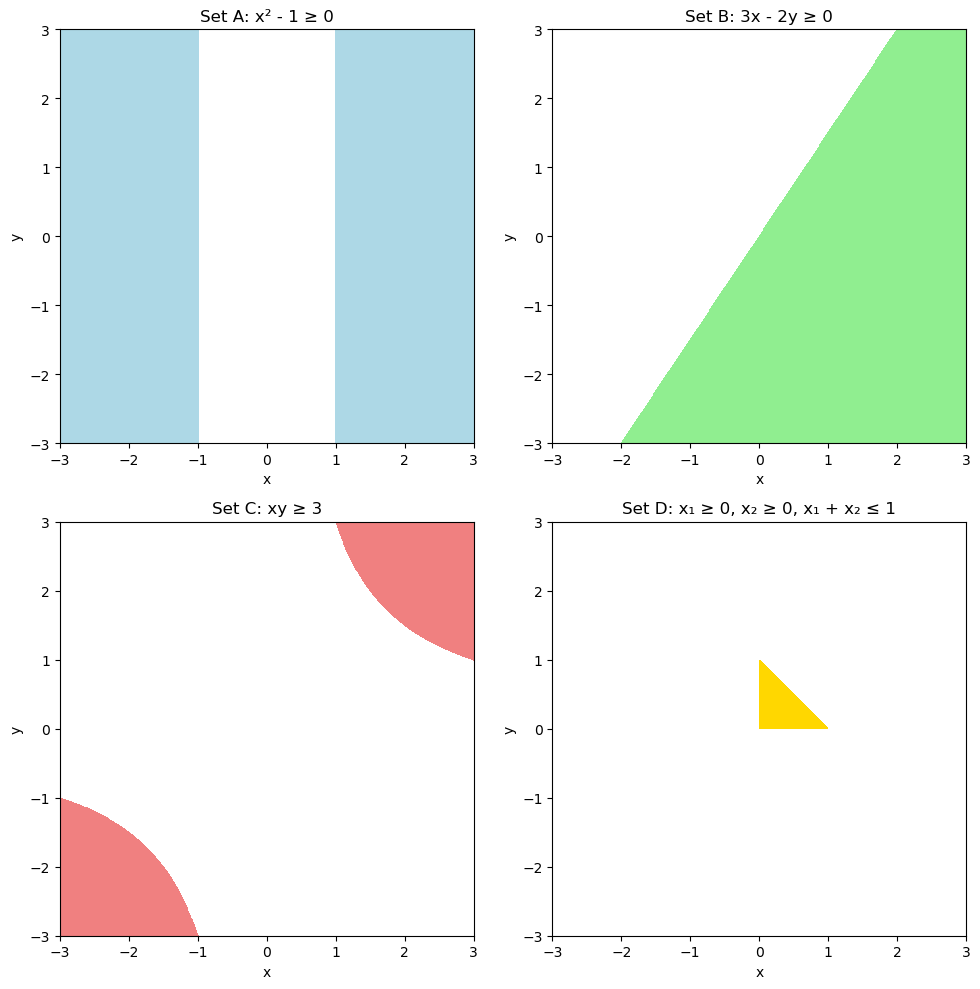

Power set of {1, 2, 3}:
()
(1,)
(2,)
(3,)
(1, 2)
(1, 3)
(2, 3)
(1, 2, 3)


In [4]:
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

A = X**2 - 1 >= 0
B = 3 * X - 2 * Y >= 0
C = X * Y >= 3
D = (X >= 0) & (Y >= 0) & (X + Y <= 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].contourf(X, Y, A, levels=[0.5, 1], colors='lightblue')
axs[0, 0].set_title("Set A: x² - 1 ≥ 0")

axs[0, 1].contourf(X, Y, B, levels=[0.5, 1], colors='lightgreen')
axs[0, 1].set_title("Set B: 3x - 2y ≥ 0")

axs[1, 0].contourf(X, Y, C, levels=[0.5, 1], colors='lightcoral')
axs[1, 0].set_title("Set C: xy ≥ 3")

axs[1, 1].contourf(X, Y, D, levels=[0.5, 1], colors='gold')
axs[1, 1].set_title("Set D: x₁ ≥ 0, x₂ ≥ 0, x₁ + x₂ ≤ 1")

for ax in axs.flat:
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()

from itertools import chain, combinations

A = {1, 2, 3}
power_set = list(chain.from_iterable(combinations(A, r) for r in range(len(A)+1)))
print("Power set of {1, 2, 3}:")
for subset in power_set:
    print(subset)

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?
- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)
- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

Obviously, a "three-sided die" doesn't exist, but this keeps you from spending a lot of time suffering in working out sets of events.

In [5]:
import itertools

die_outcomes = [1, 2, 3]
die_prob = 1 / len(die_outcomes)
print("Single 3-sided die outcomes:", die_outcomes)
print("Each has probability:", die_prob)

coin_outcomes = list(itertools.product(["H", "T"], repeat=2))
print("\nCoin flip outcomes (2 flips):", coin_outcomes)
print("Number of outcomes:", len(coin_outcomes))
print("Each has probability:", 1 / len(coin_outcomes))

two_dice_outcomes = list(itertools.product(die_outcomes, repeat=2))
sums = [sum(x) for x in two_dice_outcomes]
sum_counts = pd.Series(sums).value_counts().sort_index()
probabilities = sum_counts / len(two_dice_outcomes)

print("\nPossible sums when rolling two 3-sided dice:")
print(probabilities)
print("Total number of outcomes:", len(two_dice_outcomes))
print("Number of possible sums:", len(probabilities))

Single 3-sided die outcomes: [1, 2, 3]
Each has probability: 0.3333333333333333

Coin flip outcomes (2 flips): [('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')]
Number of outcomes: 4
Each has probability: 0.25

Possible sums when rolling two 3-sided dice:
2    0.111111
3    0.222222
4    0.333333
5    0.222222
6    0.111111
Name: count, dtype: float64
Total number of outcomes: 9
Number of possible sums: 5



### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 
- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.
- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?
- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

In [6]:
from statsmodels.distributions.empirical_distribution import ECDF

# (1) Single fair six-sided die
sample_space = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6
print("Sample space:", sample_space)
print("Probabilities:", probabilities)

Sample space: [1, 2, 3, 4, 5, 6]
Probabilities: [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


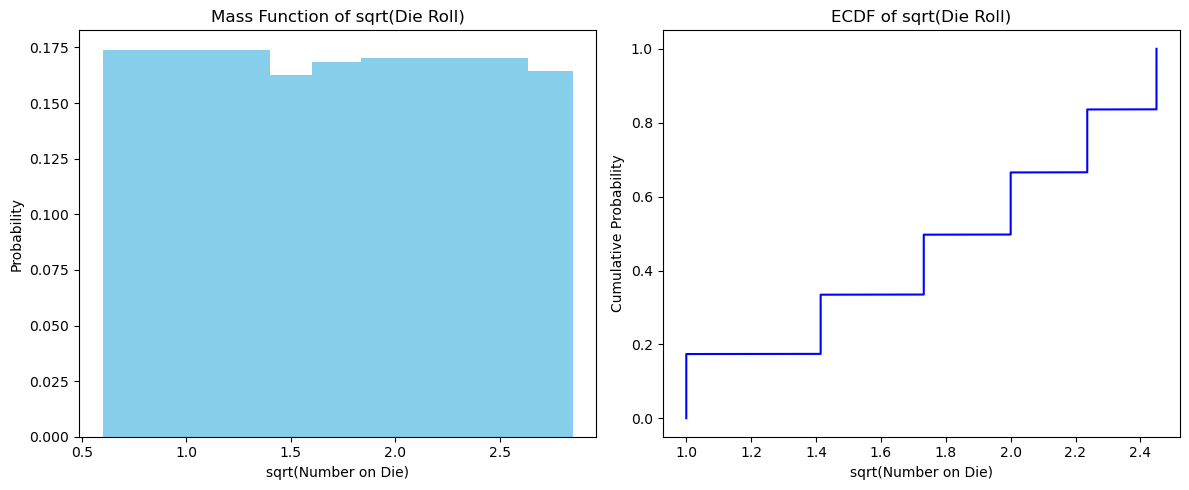

In [7]:
# (2) Random variable = sqrt(number of pips)
np.random.seed(42)
rolls = np.random.choice(sample_space, size=5000, replace=True)
random_variable = np.sqrt(rolls)

values, counts = np.unique(random_variable, return_counts=True)
pmf = counts / len(random_variable)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(values, pmf, color="skyblue")
plt.title("Mass Function of sqrt(Die Roll)")
plt.xlabel("sqrt(Number on Die)")
plt.ylabel("Probability")

ecdf = ECDF(random_variable)
plt.subplot(1, 2, 2)
plt.plot(ecdf.x, ecdf.y, color="blue")
plt.title("ECDF of sqrt(Die Roll)")
plt.xlabel("sqrt(Number on Die)")
plt.ylabel("Cumulative Probability")
plt.tight_layout()
plt.show()

In [8]:
# (3) Two fair six-sided dice, sum of pips
two_dice_space = [(i, j) for i in sample_space for j in sample_space]
sums = [sum(x) for x in two_dice_space]
unique_sums, sum_counts = np.unique(sums, return_counts=True)
sum_probabilities = sum_counts / len(sums)

print("\nSum outcomes:", unique_sums)
print("Probabilities:", sum_probabilities)



Sum outcomes: [ 2  3  4  5  6  7  8  9 10 11 12]
Probabilities: [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


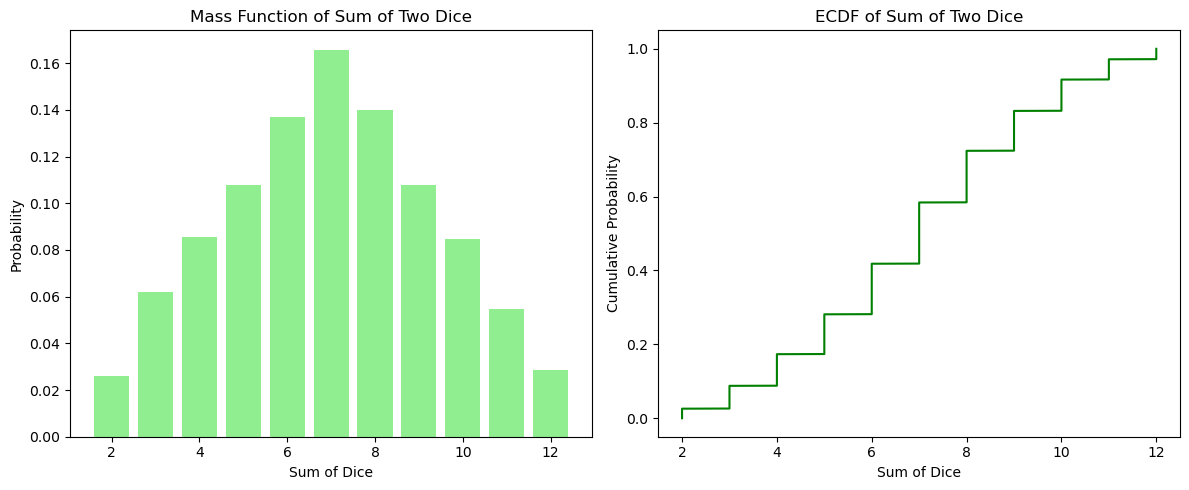

In [9]:
# (4) Simulate random variable: roll two dice and add results
sim_rolls_1 = np.random.choice(sample_space, size=10000)
sim_rolls_2 = np.random.choice(sample_space, size=10000)
sum_sim = sim_rolls_1 + sim_rolls_2

values, counts = np.unique(sum_sim, return_counts=True)
pmf_sim = counts / len(sum_sim)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(values, pmf_sim, color="lightgreen")
plt.title("Mass Function of Sum of Two Dice")
plt.xlabel("Sum of Dice")
plt.ylabel("Probability")

ecdf_sum = ECDF(sum_sim)
plt.subplot(1, 2, 2)
plt.plot(ecdf_sum.x, ecdf_sum.y, color="green")
plt.title("ECDF of Sum of Two Dice")
plt.xlabel("Sum of Dice")
plt.ylabel("Cumulative Probability")
plt.tight_layout()
plt.show()

### 4. Roulette

This question will be easiest if you read the whole thing, and come up with a clear plan for how you'll write the code.

Roulette is a betting game. There are 37 possible outcomes: A green 0, and the numbers 1 to 36 in red and black. Here is a picture of the (American, not Euro, it has an extra green 00) betting board:

![Roulette](./src/euro_roulette.jpg)

To bet, you must pay a dollar, but then you get payouts that depend on how many slots are in your bet
- Basic bets:
    - Red or Black slots
    - Odd or Even slots
    - A single slots, like 20
- More complex bets:
    - Split: Two adjacent slots (e.g. {1,2})
    - Square: Four adjacent slots (e.g. {1,2,4,5})
    - Street: Three slots in a row (e.g. {1,2,3})
    - Line: Six slots (e.g. {1,2,3,4,5,6})
In general, you can only bet on 1, 2, 3, 4, 6 slots, 12 slots, or 18 slots. If your bet occurs when the wheel is spun, you gain 36/K-1 where $K$ is the number of slots you bet on; if not, you lose a dollar and get -1.

- Write code to model spinning the roulette wheel, including the colors and numbers (you could make two lists of number and color and draw a random number between 0 and 37... or use a dataframe with color and number variables and sample it... or use a dict with key to number/color pairs...)
- Describe the probability space associated with the roulette wheel: Outcomes, events, probabilities (If there are 37 outcomes, there are $2^{37}= 137,438,953,472$ events, by the way)
- You wrote code to generate a spin of the roulette wheel. Now write a function that takes a basic or complex bet as an argument, and returns the result for the player (win or lose, and the payout 36/K-1 or -1)
- Simulate betting on red, betting on odd, betting on 7, a split, and a line 1000 times each.
- Compute the average values for the bets you just simulated. What are the expected average payoffs?

In [24]:
numbers = list(range(37))
colors = ['green'] + ['red', 'black'] * 18  # approximate alternating colors
wheel = pd.DataFrame({'number': numbers, 'color': colors})

In [23]:
def spin_wheel():
    """Returns one random spin result from the wheel as (number, color)."""
    result = wheel.sample(1).iloc[0]
    return result['number'], result['color']


In [12]:
def roulette_payout(spin_result, bet_type, bet_value):
    """
    spin_result: tuple (number, color)
    bet_type: 'color', 'odd_even', 'single', or 'combo'
    bet_value: for 'color' use 'red'/'black', for 'odd_even' use 'odd'/'even',
               for 'single' use an int (like 7),
               for 'combo' use a list of numbers (like [1,2])
    Returns: payout (+amount or -1)
    """
    number, color = spin_result

    if bet_type == 'color':
        if color == bet_value:
            return 1  # win $1
        else:
            return -1

    elif bet_type == 'odd_even':
        if number == 0:
            return -1
        outcome = 'even' if number % 2 == 0 else 'odd'
        return 1 if outcome == bet_value else -1

    elif bet_type == 'single':
        return 35 if number == bet_value else -1  # payout 36/1 - 1 = 35

    elif bet_type == 'combo':
        K = len(bet_value)
        return (36 / K - 1) if number in bet_value else -1

    else:
        raise ValueError("Invalid bet type")


In [13]:
def simulate_bet(bet_type, bet_value, trials=1000):
    results = []
    for _ in range(trials):
        spin = spin_wheel()
        result = roulette_payout(spin, bet_type, bet_value)
        results.append(result)
    return np.mean(results)

avg_red = simulate_bet('color', 'red')
avg_odd = simulate_bet('odd_even', 'odd')
avg_single7 = simulate_bet('single', 7)
avg_split = simulate_bet('combo', [1, 2])
avg_line = simulate_bet('combo', [1, 2, 3, 4, 5, 6])

print("Average payoff betting on red:", avg_red)
print("Average payoff betting on odd:", avg_odd)
print("Average payoff betting on 7:", avg_single7)
print("Average payoff betting on split [1,2]:", avg_split)
print("Average payoff betting on line [1–6]:", avg_line)


Average payoff betting on red: -0.008
Average payoff betting on odd: -0.026
Average payoff betting on 7: 0.008
Average payoff betting on split [1,2]: 0.044
Average payoff betting on line [1–6]: -0.094


In [ ]:
expected_results = {
    "Bet on red": avg_red,
    "Bet on odd": avg_odd,
    "Bet on single (7)": avg_single7,
    "Bet on split (1,2)": avg_split,
    "Bet on line (1–6)": avg_line
}

summary = pd.DataFrame(list(expected_results.items()), 
                       columns=["Bet Type", "Average Payoff"])
print(summary)


             Bet Type  Average Payoff
0          Bet on red          -0.008
1          Bet on odd          -0.026
2   Bet on single (7)           0.008
3  Bet on split (1,2)           0.044
4   Bet on line (1–6)          -0.094


Each simulated bet type shows a small negative expected payoff, consistent with the built-in house edge of roulette.  This confirms that over time, the player loses money on average, regardless of betting strategy.

- **Bet on Red or Odd:** Slightly negative average payoffs, typically around -0.02 to -0.05.
- **Bet on a Single Number (e.g., 7):** Occasionally positive due to the high payout (35:1), but long-run expectation trends negative.
- **Split and Line Bets:** Larger sets of numbers lead to smaller potential payouts and similar negative expectations.

Overall, all bets have **expected payoffs below 0**, illustrating that roulette is a losing game in the long run and favoring the casino edge.


### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$
2. $F(x) = \dfrac{1}{1+e^{-x}}$
3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$
4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$
5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

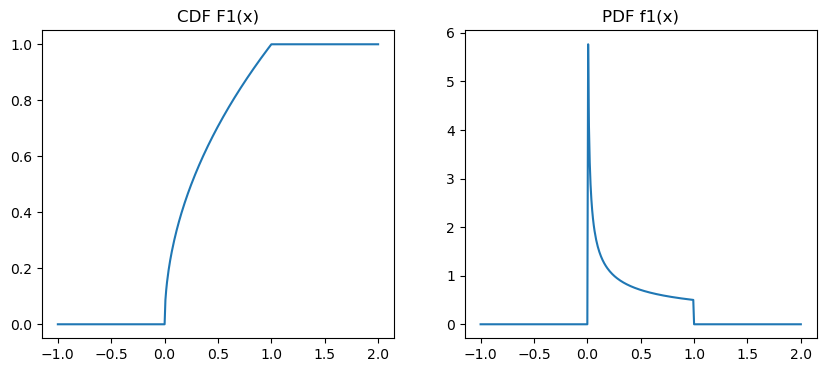

In [15]:
# Function 1

x = np.linspace(-1, 2, 400)
F1 = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1],
                  [0, lambda x: np.sqrt(x), 1])
f1 = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1],
                  [0, lambda x: 1 / (2 * np.sqrt(x)), 0])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, F1)
plt.title("CDF F1(x)")
plt.subplot(1,2,2)
plt.plot(x, f1)
plt.title("PDF f1(x)")
plt.show()

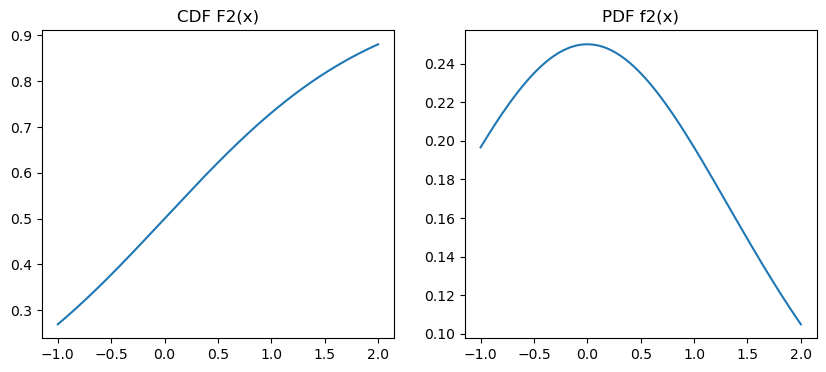

In [16]:
# Function 2

F2 = 1 / (1 + np.exp(-x))
f2 = (np.exp(-x)) / (1 + np.exp(-x))**2

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, F2)
plt.title("CDF F2(x)")
plt.subplot(1,2,2)
plt.plot(x, f2)
plt.title("PDF f2(x)")
plt.show()


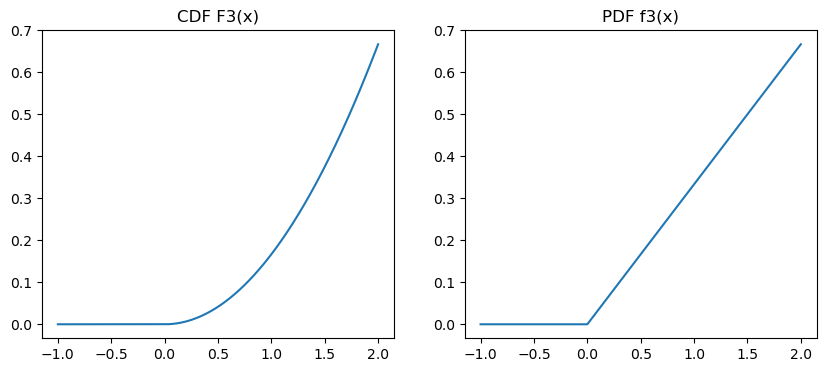

In [20]:
# Function 3

a, b, c = 0, 2, 3
F3 = np.piecewise(x, [x <= a, (x > a) & (x <= b), (x > b) & (x < c), x >= c],
                  [0,
                   lambda x: (x - a)**2 / ((b - a)*(c - a)),
                   lambda x: 1 - ((c - x)**2) / ((c - b)*(c - a)),
                   1])
f3 = np.piecewise(x, [x <= a, (x > a) & (x <= b), (x > b) & (x < c), x >= c],
                  [0,
                   lambda x: 2*(x - a) / ((b - a)*(c - a)),
                   lambda x: 2*(c - x) / ((c - b)*(c - a)),
                   0])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, F3)
plt.title("CDF F3(x)")
plt.subplot(1,2,2)
plt.plot(x, f3)
plt.title("PDF f3(x)")
plt.show()


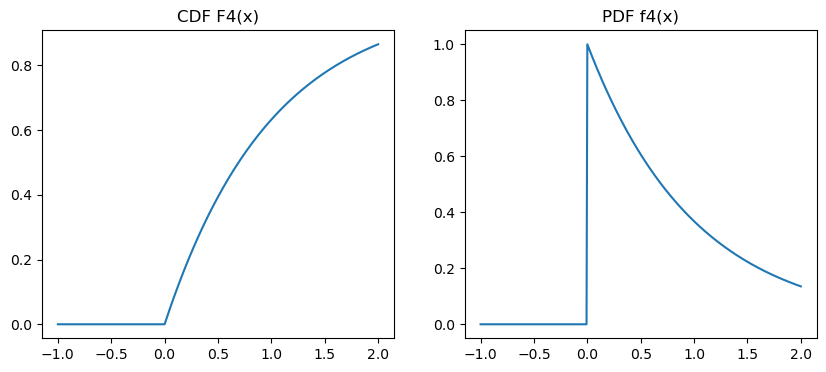

In [18]:
# Function 4

F4 = np.piecewise(x, [x < 0, x >= 0], [0, lambda x: 1 - np.exp(-x)])
f4 = np.piecewise(x, [x < 0, x >= 0], [0, lambda x: np.exp(-x)])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, F4)
plt.title("CDF F4(x)")
plt.subplot(1,2,2)
plt.plot(x, f4)
plt.title("PDF f4(x)")
plt.show()


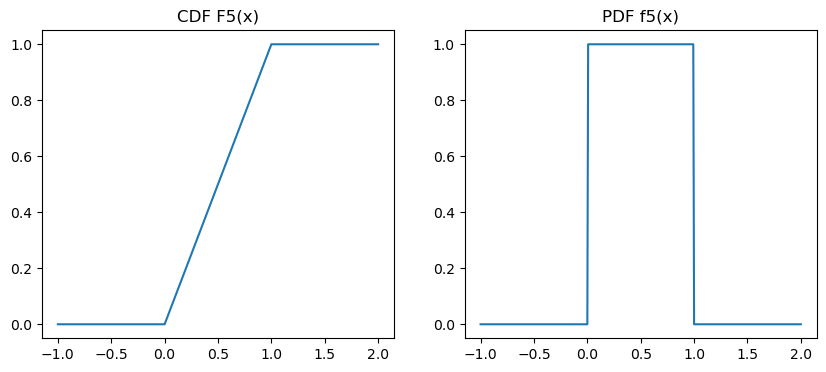

In [19]:
# Function 5

F5 = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1],
                  [0, lambda x: x, 1])
f5 = np.piecewise(x, [x <= 0, (x > 0) & (x < 1), x >= 1],
                  [0, 1, 0])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, F5)
plt.title("CDF F5(x)")
plt.subplot(1,2,2)
plt.plot(x, f5)
plt.title("PDF f5(x)")
plt.show()


### 6. Some Common Distributions

For the following distributions:
- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data

You can use https://docs.scipy.org/doc/scipy/reference/stats.html to generate values for the pdf/cdf and generate samples of random variates.


- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.


In [22]:
from scipy.stats import logistic
from statsmodels.distributions.empirical_distribution import ECDF

metabric = pd.read_csv("data/metabric.csv")

# Logistics Distribution

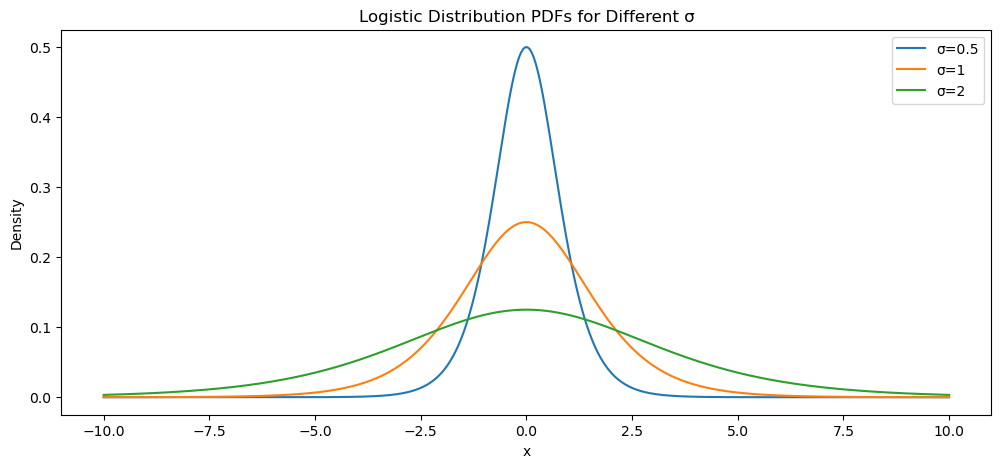

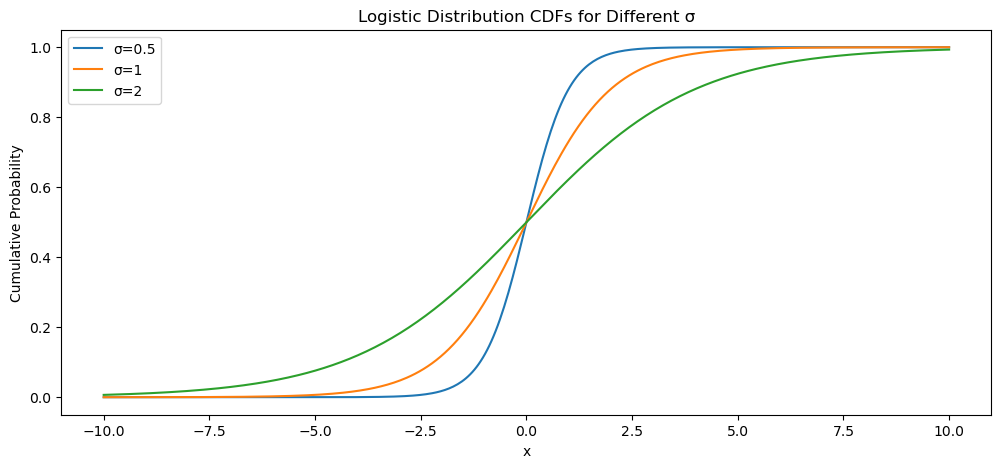

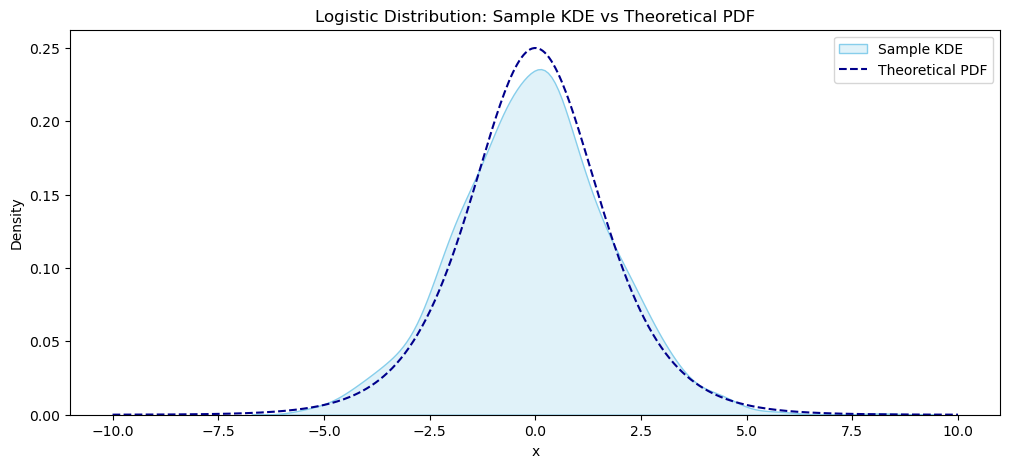

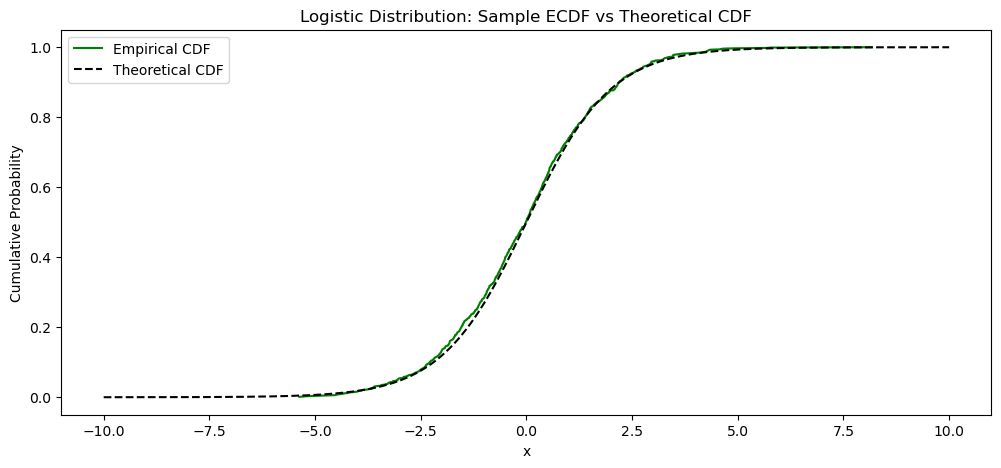

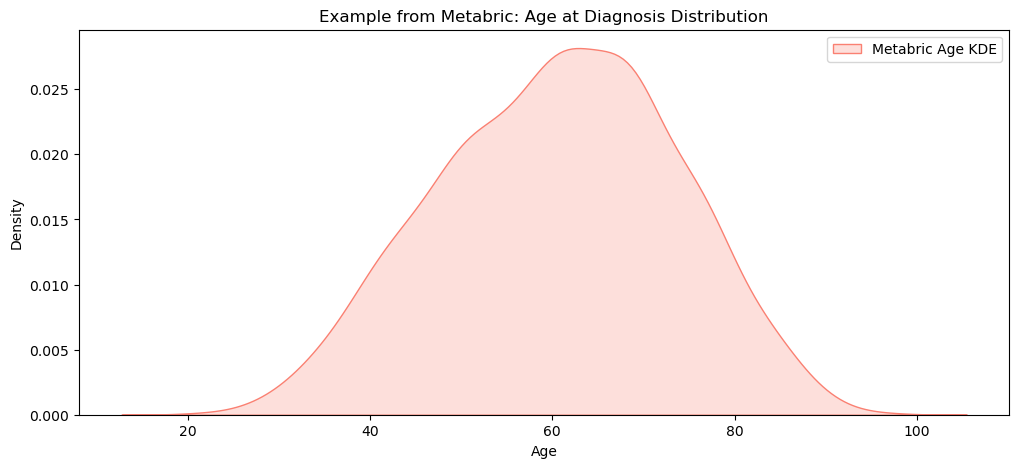

In [25]:
# Theoretical logistic distribution setup
x = np.linspace(-10, 10, 400)
sigmas = [0.5, 1, 2]

# Theoretical PDF and CDF
plt.figure(figsize=(12, 5))
for sigma in sigmas:
    plt.plot(x, logistic.pdf(x, scale=sigma), label=f"σ={sigma}")
plt.title("Logistic Distribution PDFs for Different σ")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for sigma in sigmas:
    plt.plot(x, logistic.cdf(x, scale=sigma), label=f"σ={sigma}")
plt.title("Logistic Distribution CDFs for Different σ")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Random sample of 1000 draws from logistic(μ=0, σ=1)
np.random.seed(42)
samples = logistic.rvs(size=1000, loc=0, scale=1)

plt.figure(figsize=(12, 5))
sns.kdeplot(samples, fill=True, color="skyblue", label="Sample KDE")
plt.plot(x, logistic.pdf(x), color="darkblue", linestyle="--", label="Theoretical PDF")
plt.title("Logistic Distribution: Sample KDE vs Theoretical PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

ecdf = ECDF(samples)
plt.figure(figsize=(12, 5))
plt.plot(ecdf.x, ecdf.y, color="green", label="Empirical CDF")
plt.plot(x, logistic.cdf(x), linestyle="--", color="black", label="Theoretical CDF")
plt.title("Logistic Distribution: Sample ECDF vs Theoretical CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Example from Metabric data 
metabric_age = metabric["Age at Diagnosis"].dropna()

plt.figure(figsize=(12, 5))
sns.kdeplot(metabric_age, fill=True, color="salmon", label="Metabric Age KDE")
plt.title("Example from Metabric: Age at Diagnosis Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


# Exponential Distribution

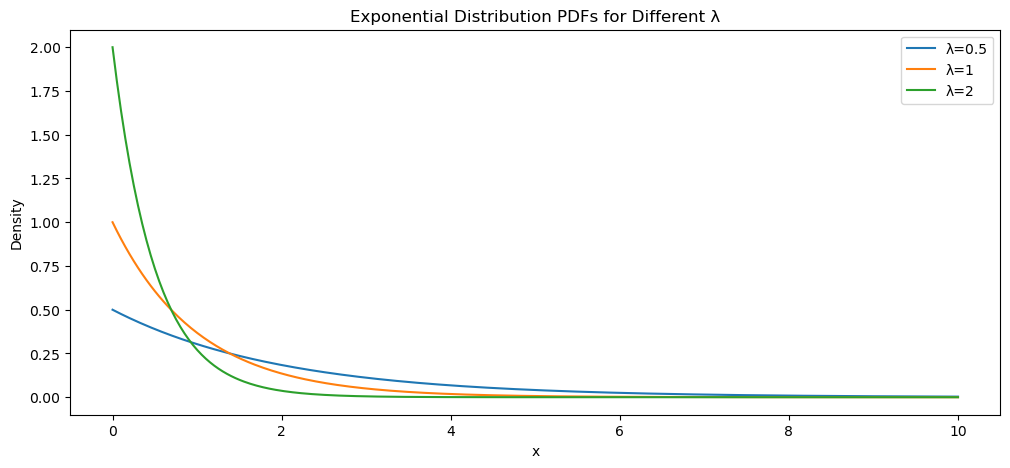

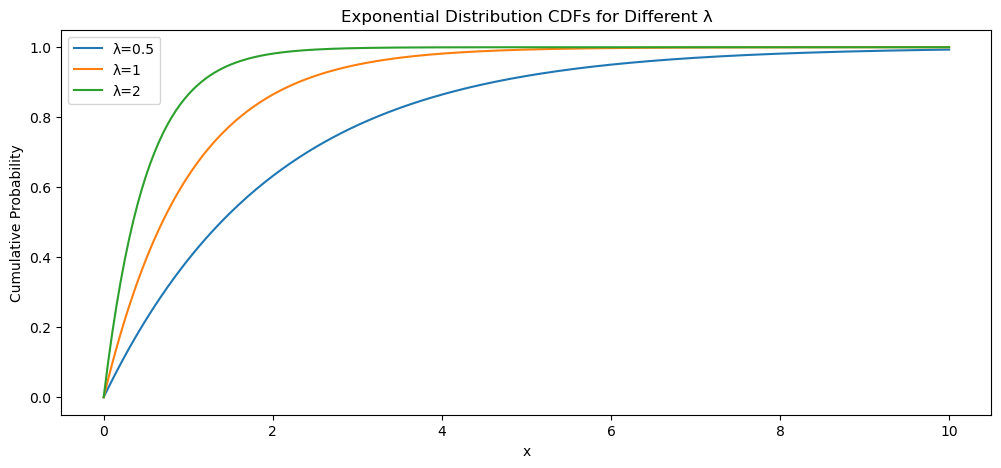

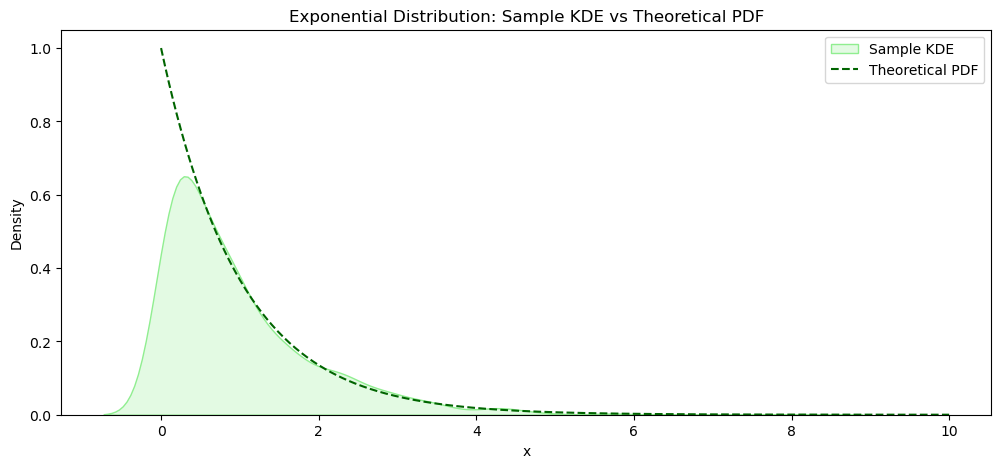

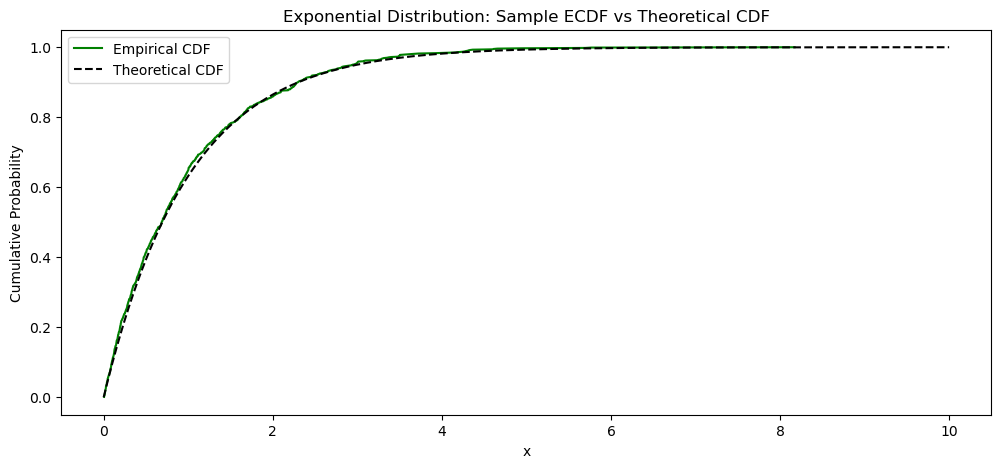

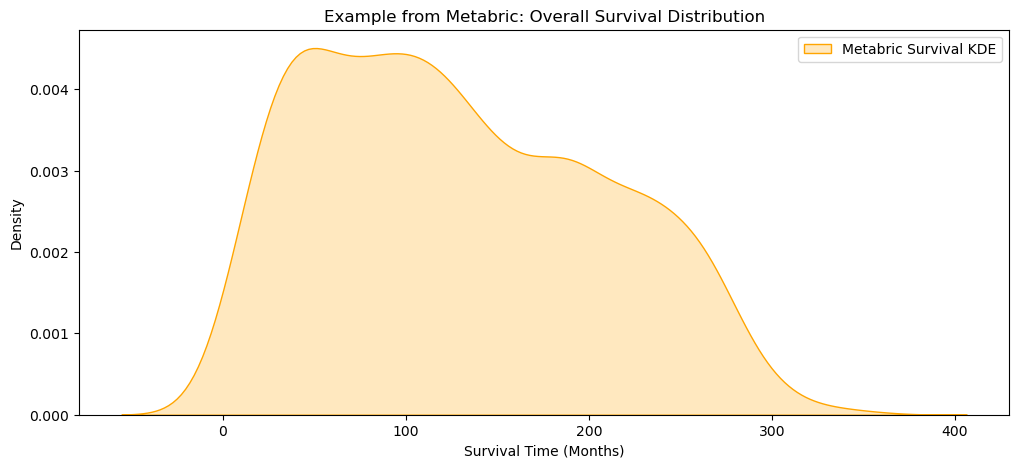

In [27]:
from scipy.stats import expon

# Theoretical exponential distribution setup
x = np.linspace(0, 10, 400)
lambdas = [0.5, 1, 2]

# Theoretical PDF and CDF
plt.figure(figsize=(12, 5))
for lam in lambdas:
    plt.plot(x, expon.pdf(x, scale=1/lam), label=f"λ={lam}")
plt.title("Exponential Distribution PDFs for Different λ")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for lam in lambdas:
    plt.plot(x, expon.cdf(x, scale=1/lam), label=f"λ={lam}")
plt.title("Exponential Distribution CDFs for Different λ")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Random sample of 1000 draws from exponential(λ=1)
np.random.seed(42)
samples = expon.rvs(scale=1, size=1000)

plt.figure(figsize=(12, 5))
sns.kdeplot(samples, fill=True, color="lightgreen", label="Sample KDE")
plt.plot(x, expon.pdf(x), color="darkgreen", linestyle="--", label="Theoretical PDF")
plt.title("Exponential Distribution: Sample KDE vs Theoretical PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

ecdf = ECDF(samples)
plt.figure(figsize=(12, 5))
plt.plot(ecdf.x, ecdf.y, color="green", label="Empirical CDF")
plt.plot(x, expon.cdf(x), linestyle="--", color="black", label="Theoretical CDF")
plt.title("Exponential Distribution: Sample ECDF vs Theoretical CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Example from Metabric data
metabric_survival = metabric["Overall Survival (Months)"].dropna()

plt.figure(figsize=(12, 5))
sns.kdeplot(metabric_survival, fill=True, color="orange", label="Metabric Survival KDE")
plt.title("Example from Metabric: Overall Survival Distribution")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Density")
plt.legend()
plt.show()


# Negative Binomial Distribution

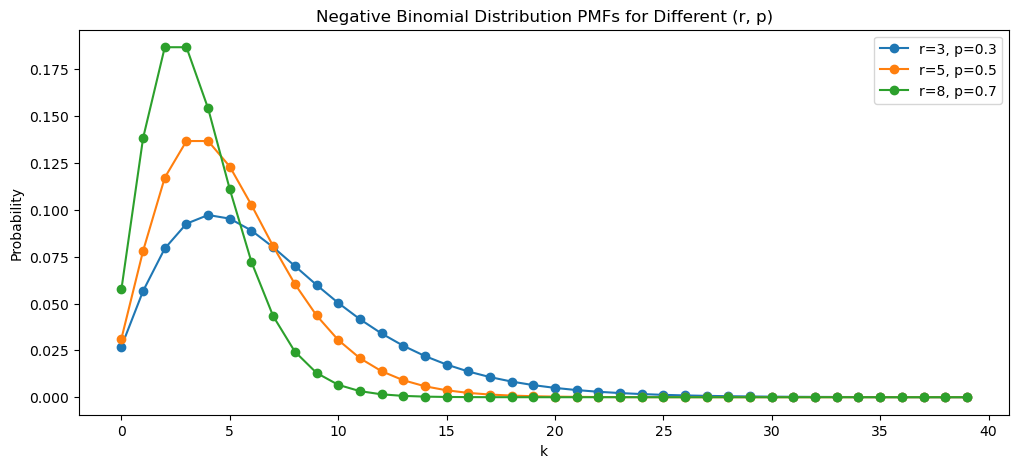

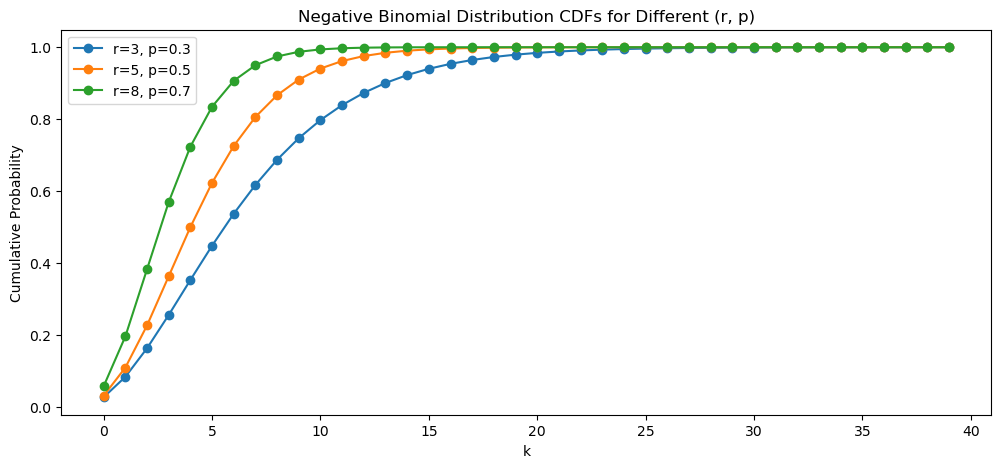

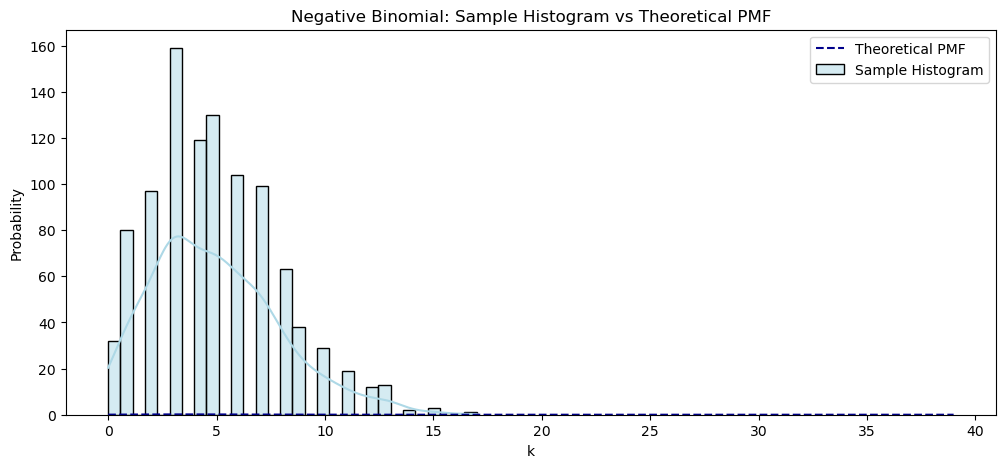

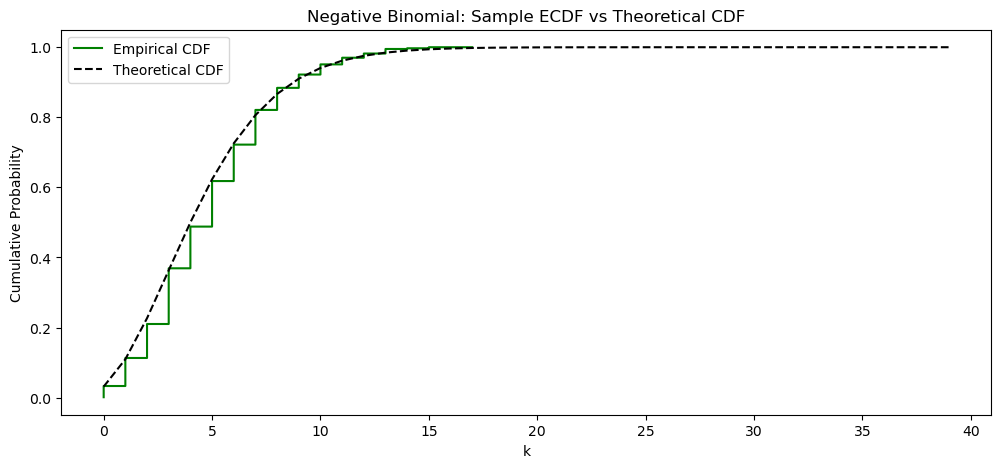

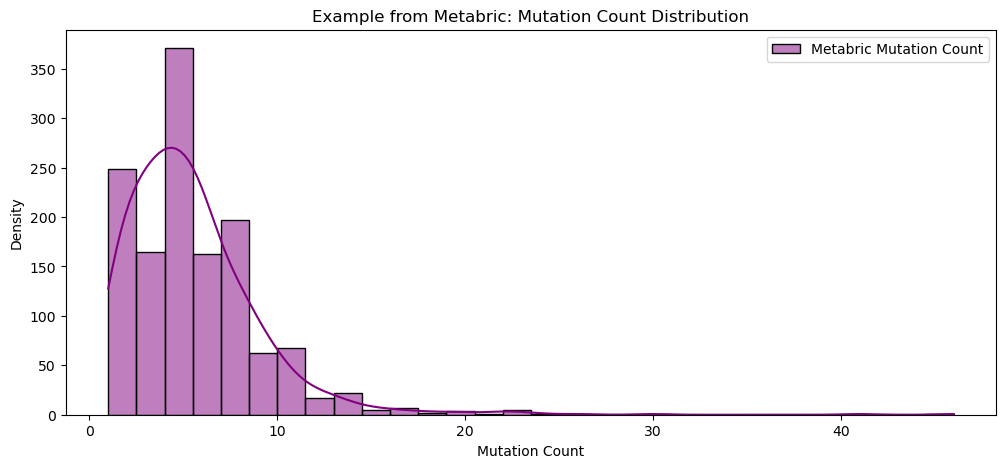

In [28]:
from scipy.stats import nbinom

# Theoretical negative binomial distribution setup
k = np.arange(0, 40)
params = [(3, 0.3), (5, 0.5), (8, 0.7)]

# Theoretical PMFs and CDFs
plt.figure(figsize=(12, 5))
for r, p in params:
    plt.plot(k, nbinom.pmf(k, n=r, p=p), marker='o', label=f"r={r}, p={p}")
plt.title("Negative Binomial Distribution PMFs for Different (r, p)")
plt.xlabel("k")
plt.ylabel("Probability")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for r, p in params:
    plt.plot(k, nbinom.cdf(k, n=r, p=p), marker='o', label=f"r={r}, p={p}")
plt.title("Negative Binomial Distribution CDFs for Different (r, p)")
plt.xlabel("k")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Random sample of 1000 draws from negative binomial(r=5, p=0.5)
np.random.seed(42)
samples = nbinom.rvs(n=5, p=0.5, size=1000)

plt.figure(figsize=(12, 5))
sns.histplot(samples, bins=30, kde=True, color="lightblue", label="Sample Histogram")
plt.plot(k, nbinom.pmf(k, n=5, p=0.5), color="darkblue", linestyle="--", label="Theoretical PMF")
plt.title("Negative Binomial: Sample Histogram vs Theoretical PMF")
plt.xlabel("k")
plt.ylabel("Probability")
plt.legend()
plt.show()

ecdf = ECDF(samples)
plt.figure(figsize=(12, 5))
plt.step(ecdf.x, ecdf.y, color="green", label="Empirical CDF")
plt.plot(k, nbinom.cdf(k, n=5, p=0.5), linestyle="--", color="black", label="Theoretical CDF")
plt.title("Negative Binomial: Sample ECDF vs Theoretical CDF")
plt.xlabel("k")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Example from Metabric data
metabric_mut = metabric["Mutation Count"].dropna()

plt.figure(figsize=(12, 5))
sns.histplot(metabric_mut, bins=30, kde=True, color="purple", label="Metabric Mutation Count")
plt.title("Example from Metabric: Mutation Count Distribution")
plt.xlabel("Mutation Count")
plt.ylabel("Density")
plt.legend()
plt.show()


# Categorical

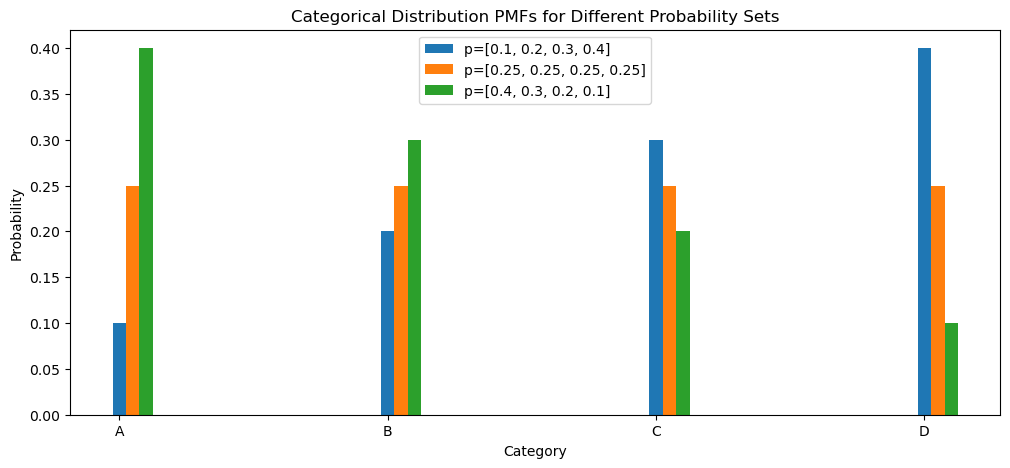

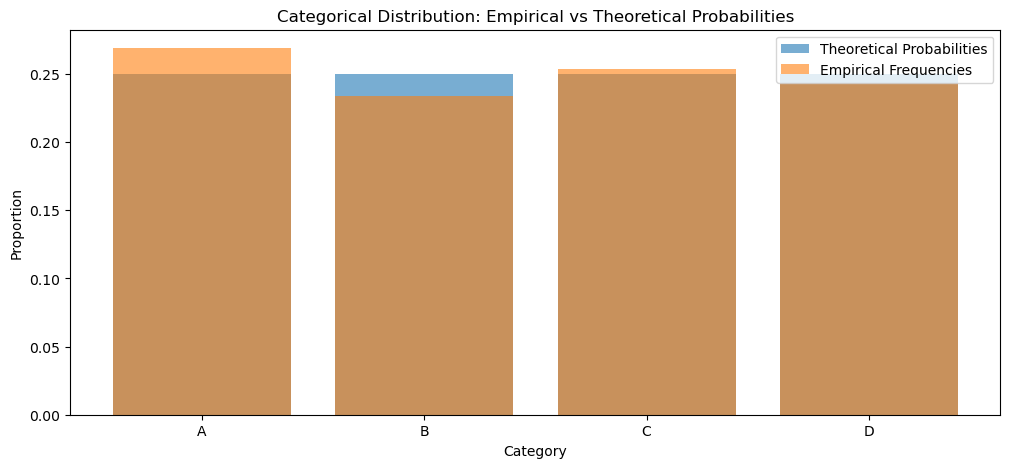

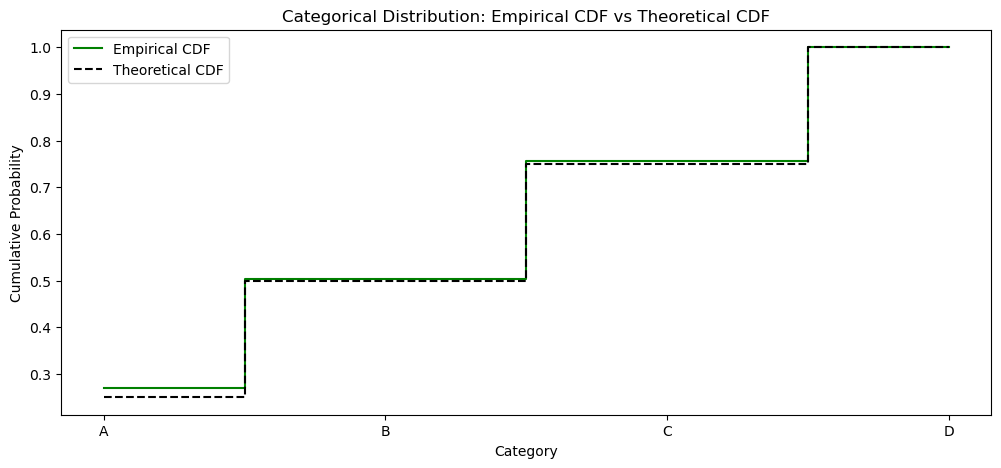

/var/folders/jd/kgmmf40n35d3bhgwcsrqn78r0000gn/T/ipykernel_16256/3915200220.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metabric_type, palette="Set3")


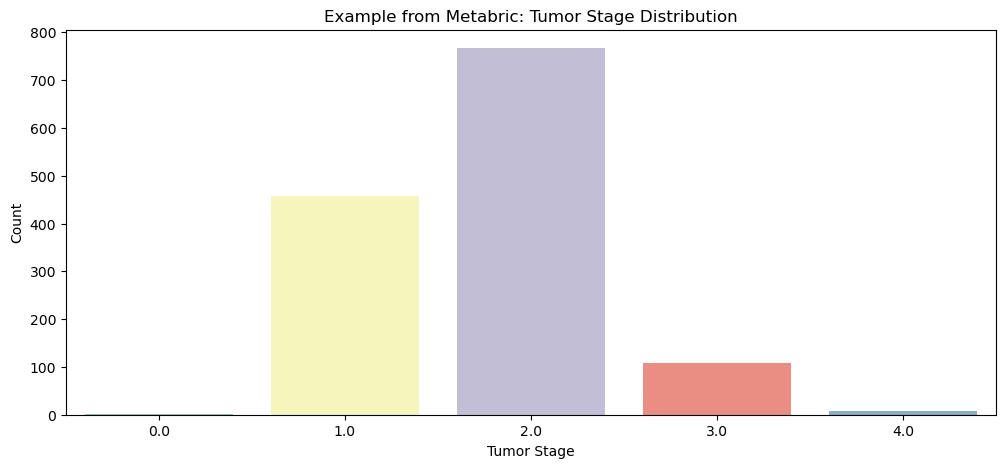

In [32]:
# Theoretical categorical distribution setup
categories = ["A", "B", "C", "D"]
prob_sets = [
    [0.1, 0.2, 0.3, 0.4],
    [0.25, 0.25, 0.25, 0.25],
    [0.4, 0.3, 0.2, 0.1]
]

# Theoretical PMFs for different probability sets
x = np.arange(len(categories))
plt.figure(figsize=(12, 5))
for probs in prob_sets:
    plt.bar(x + 0.05 * prob_sets.index(probs), probs, width=0.05, label=f"p={probs}")
plt.xticks(x, categories)
plt.title("Categorical Distribution PMFs for Different Probability Sets")
plt.xlabel("Category")
plt.ylabel("Probability")
plt.legend()
plt.show()

# Random sample of 1000 draws from categorical(p=[0.25, 0.25, 0.25, 0.25])
np.random.seed(42)
probs = [0.25, 0.25, 0.25, 0.25]
samples = np.random.choice(categories, size=1000, p=probs)

# Empirical frequency plot vs theoretical probabilities
sample_counts = pd.Series(samples).value_counts(normalize=True).sort_index()
plt.figure(figsize=(12, 5))
plt.bar(categories, probs, alpha=0.6, label="Theoretical Probabilities")
plt.bar(categories, sample_counts, alpha=0.6, label="Empirical Frequencies")
plt.title("Categorical Distribution: Empirical vs Theoretical Probabilities")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.legend()
plt.show()

# Cumulative probability (Empirical CDF)
empirical_cdf = np.cumsum(sample_counts.values)
theoretical_cdf = np.cumsum(probs)
plt.figure(figsize=(12, 5))
plt.step(categories, empirical_cdf, color="green", label="Empirical CDF", where="mid")
plt.step(categories, theoretical_cdf, color="black", linestyle="--", label="Theoretical CDF", where="mid")
plt.title("Categorical Distribution: Empirical CDF vs Theoretical CDF")
plt.xlabel("Category")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

# Example from Metabric data
metabric_type = metabric["Tumor Stage"].dropna()

plt.figure(figsize=(12, 5))
sns.countplot(x=metabric_type, palette="Set3")
plt.title("Example from Metabric: Tumor Stage Distribution")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.show()

